## Download and Explore the Data

In [1]:
# %pip install mlxtend --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from mlxtend.evaluate import bias_variance_decomp

import warnings
warnings.filterwarnings('ignore')

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
import os

with ZipFile('house-prices-advanced-regression-techniques.zip') as f:
  f.extractall(path = 'house-prices')

data_dir = 'house-prices'
os.listdir(data_dir)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
# reading the dataset
train_csv_path = data_dir + '/train.csv'

housing_df = pd.read_csv(train_csv_path)

housing_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
#having a quick look at the dataset information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# checking the number of rows (observations) and columns (features) in the dataset
housing_df.shape

(1460, 81)

In [8]:
housing_df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [9]:
# Adding 'HouseAge' column 
HouseAge = 2022 - housing_df['YearBuilt']
housing_df['HouseAge'] = HouseAge

# Dropping unnecessary columns
housing_df.drop(columns = ['Id', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'], axis = 1, inplace = True)

# Selecting numeric column names from the dataset
numeric_cols = housing_df.select_dtypes(include = np.number).columns.tolist()
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'HouseAge']

In [10]:
# Selecing categorical column names from the dataset
categorical_cols = housing_df.select_dtypes(include = 'object').columns.tolist()
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
print('Number of Numeric Features:', len(numeric_cols))
print('Number of Categorical Features:', len(categorical_cols))

Number of Numeric Features: 34
Number of Categorical Features: 43


### Exploratory Data Analysis


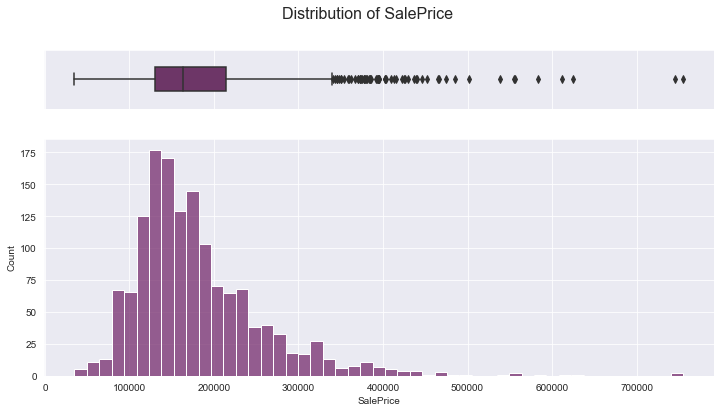

In [12]:
# Distribution of SalePrice
fig, axes = plt.subplots(2, 1, figsize = (12, 6), sharex = True, gridspec_kw = {'height_ratios': [1, 4]})
plt.subplots_adjust(wspace = 0.3)

fig.suptitle('Distribution of SalePrice', fontsize = 16)

sns.boxplot(data = housing_df, x = 'SalePrice', width = 0.4, color = '#762D6E', ax = axes.flat[0])
axes[0].set(xlabel = None)

sns.histplot(data = housing_df, x = 'SalePrice', color = '#762D6E', ax = axes.flat[1]);

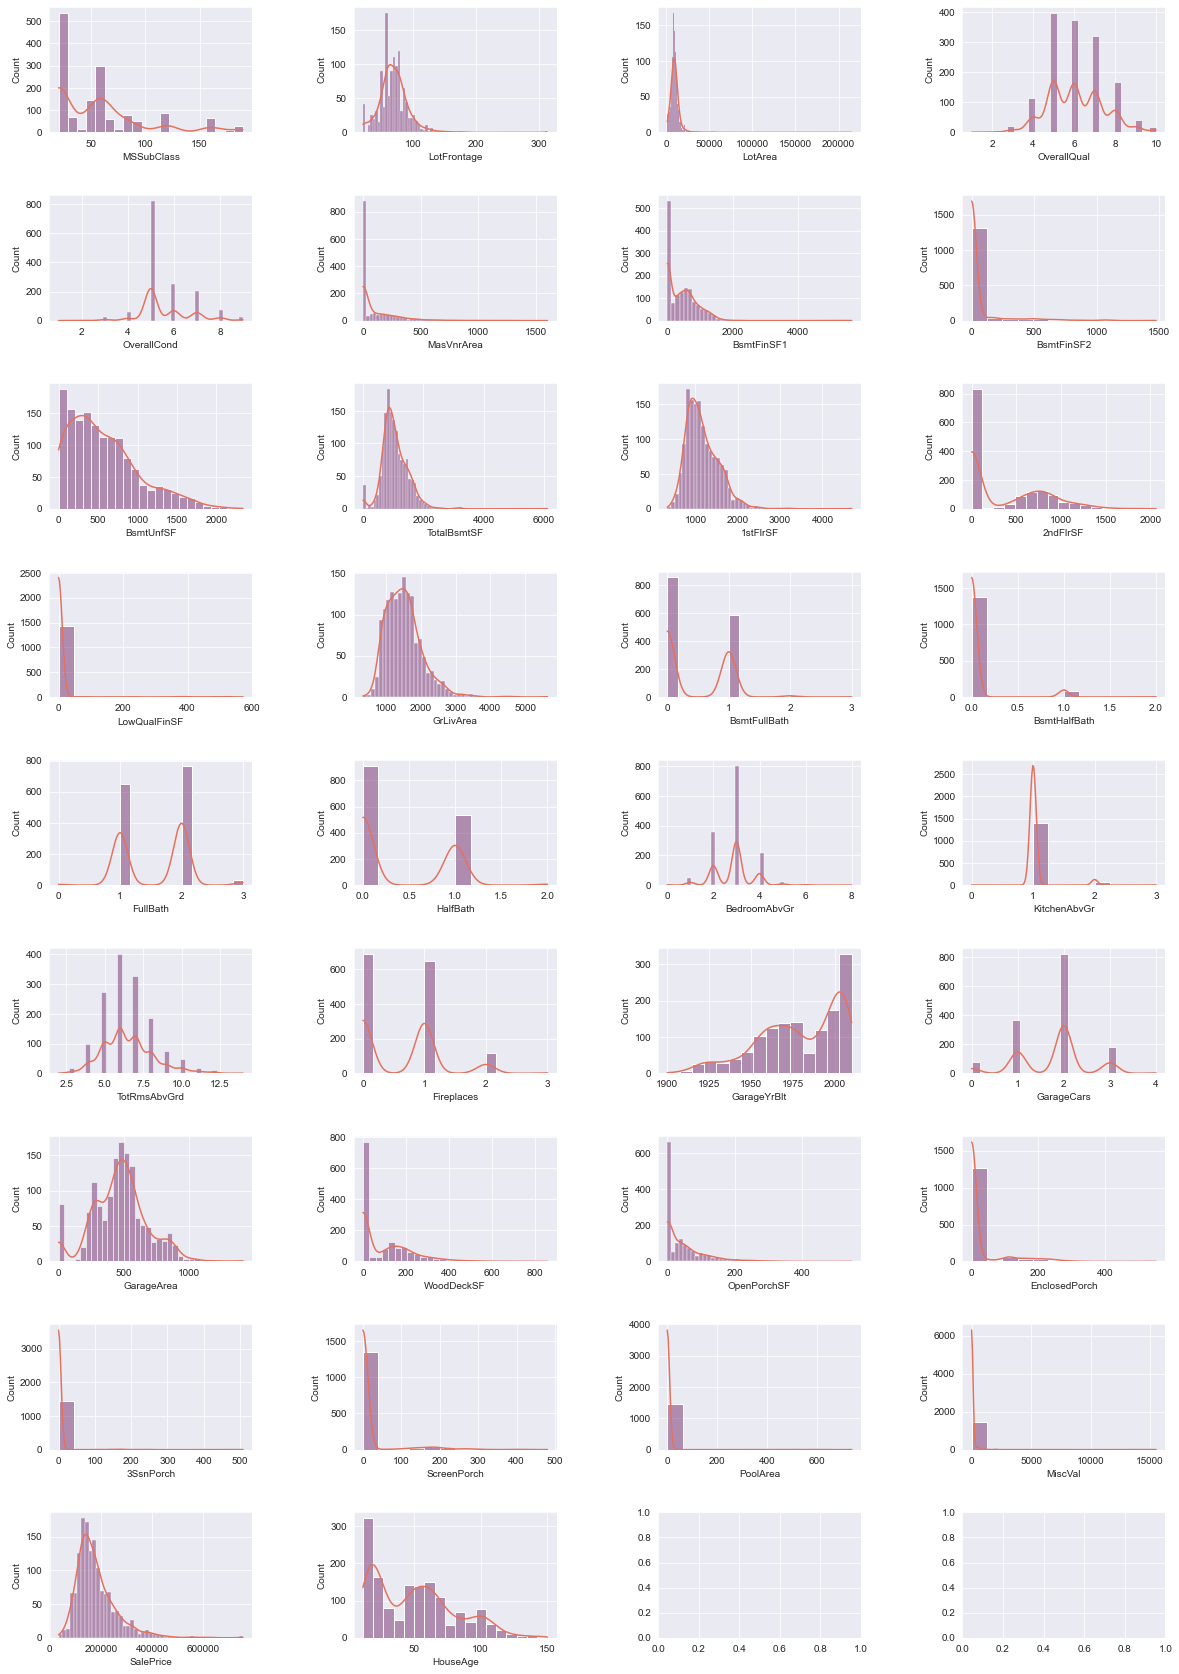

In [13]:
# Studying the distributions of numeric features
fig, axes = plt.subplots(9, 4, figsize = (20, 30))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

for position, name in enumerate(numeric_cols):
  g = sns.histplot(data = housing_df, x = name, ax = axes.flat[position], color = '#762D6E', kde = True)
  g.lines[0].set_color('#E4715E');

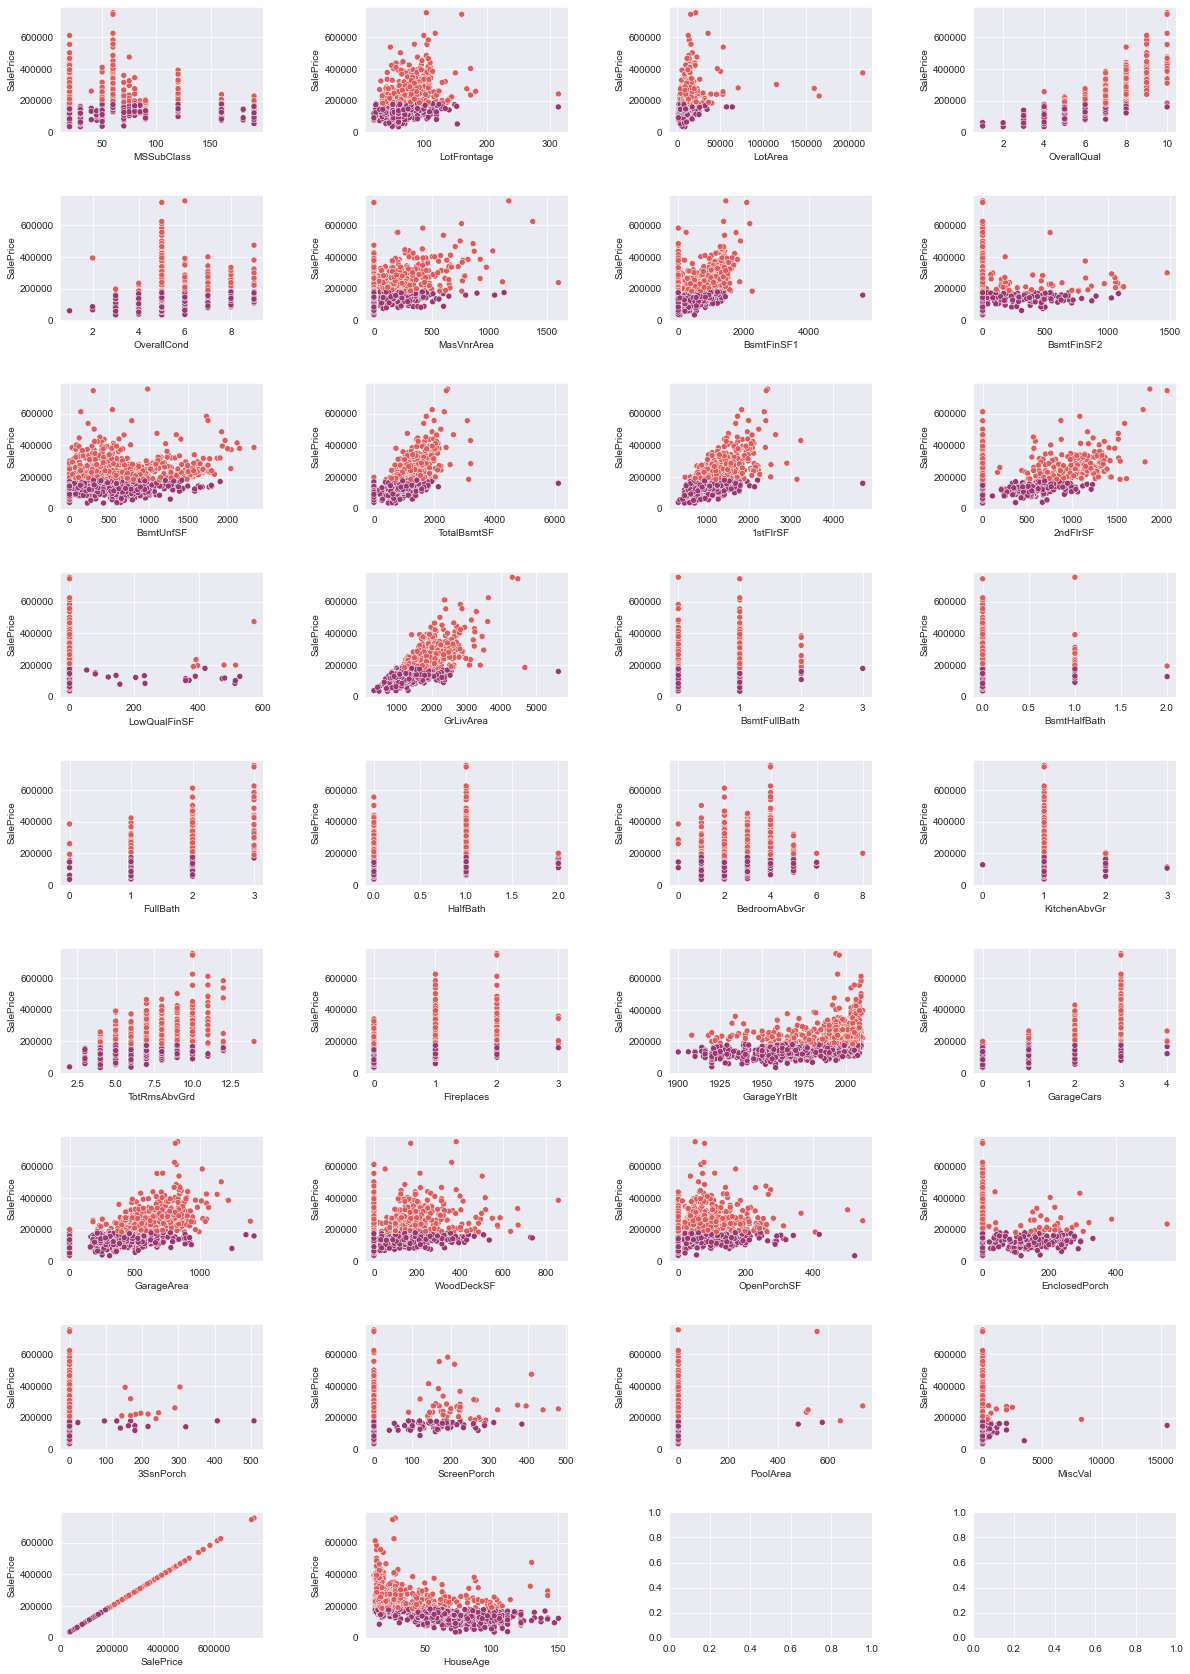

In [14]:
# Observing the relationships between SalePrice and other numeric features
fig, axes = plt.subplots(9, 4, figsize = (20, 30))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sale_price_mean = housing_df.SalePrice.mean()

for position, name in enumerate(numeric_cols):
  sns.scatterplot(data = housing_df, x = name, y = 'SalePrice', ax = axes.flat[position],
                  hue = housing_df.SalePrice < sale_price_mean, legend = False, palette = 'flare')

In [15]:
housing_df[categorical_cols].nunique().sort_values(ascending = False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

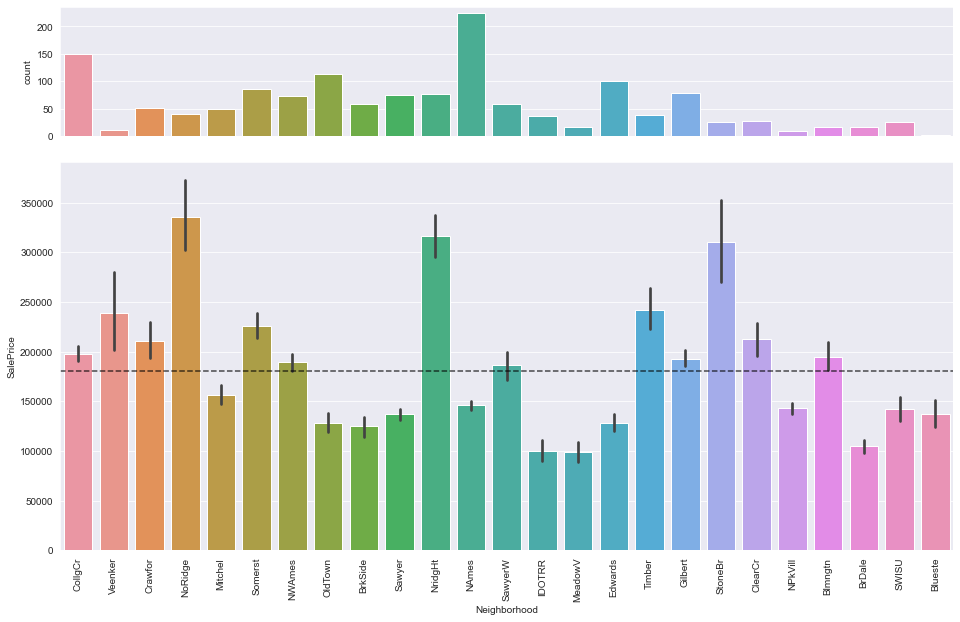

In [16]:
# Studying how 'Neighborhood' affects the 'SalePrice'
fig, axes = plt.subplots(2, 1, figsize = (16, 10), sharex = True, gridspec_kw = {'height_ratios': [1, 3]})
plt.subplots_adjust(hspace = 0.1)

sns.countplot(data = housing_df, x = 'Neighborhood', ax = axes.flat[0])
axes[0].set(xlabel = None)

sns.barplot(data = housing_df, x = 'Neighborhood', y = 'SalePrice', ax = axes.flat[1])
plt.axhline(housing_df['SalePrice'].mean(), color = 'black', linestyle = '--', alpha = 0.7)
plt.xticks(rotation = 90);

We can learn from the above figure that the housing prices are high in NoRidge (Northridge), NridgHt (Northridge Heights), and StoneBr (Stone Brook). But the marjoiryt of people live in NAmes (North Ames) and CollgCr (College Creek).

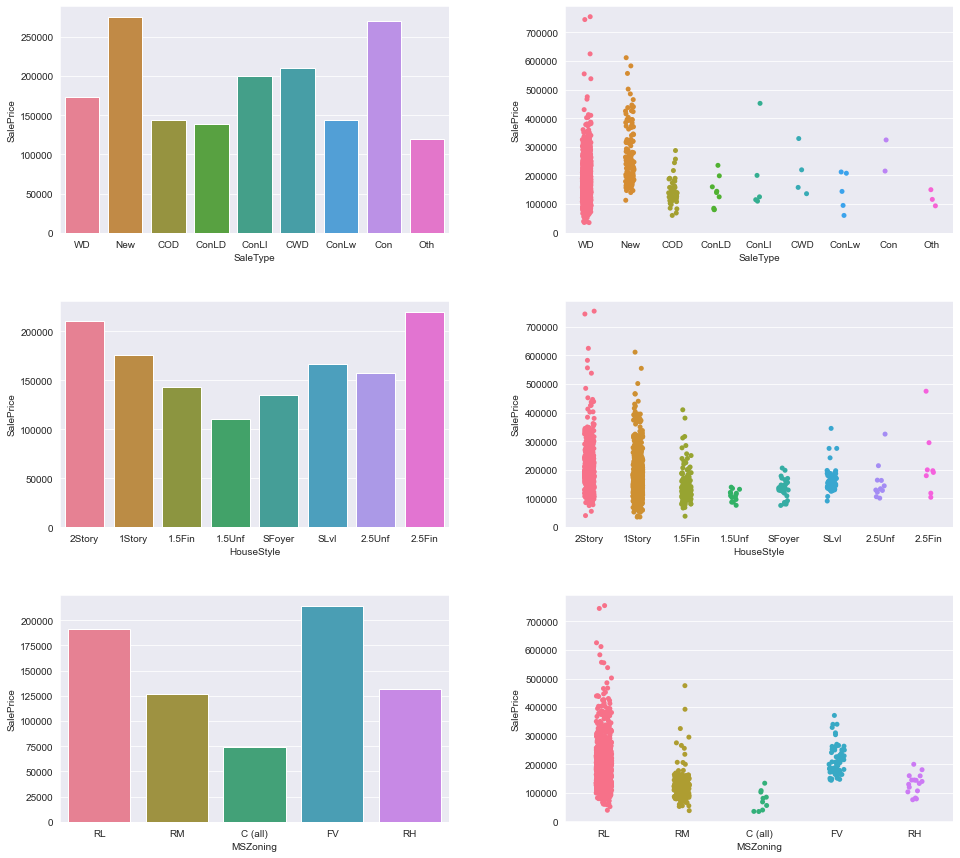

In [17]:
# Understanding how 'SaleType', 'HouseStyle', and 'MSZoning' affects the 'SalePrice'
# and how these 
columns = ['SaleType', 'HouseStyle', 'MSZoning']

fig, axes = plt.subplots(3, 2, figsize = (16, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

stripplot_indexer = 1

for position, name in enumerate(columns):
  sns.barplot(data = housing_df, x = name, y = 'SalePrice', ax = axes.flat[position * 2], palette = 'husl', ci = None)
  sns.stripplot(data = housing_df, x = name, y = 'SalePrice', ax = axes.flat[position + stripplot_indexer], palette = 'husl');
  stripplot_indexer += 1

## Preparing the Data for Training

### Knowing Inputs and Targets





In [18]:
# Removing 'SalePrice' column to select numeric variables for inputs_df
numeric_features = housing_df[numeric_cols].columns.tolist()
numeric_features.remove('SalePrice')

print("Length:", len(numeric_features))
np.array(numeric_features)

Length: 33


array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'HouseAge'], dtype='<U13')

In [19]:
# Categorical variables
categorical_features = housing_df[categorical_cols].columns.tolist()

print("Length:", len(categorical_features))
np.array(categorical_features)

Length: 43


array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype='<U13')

In [20]:
# input features and target feature
input_features = numeric_features + categorical_features
target_feature = housing_df['SalePrice'].name

print("Input Features:", input_features)
print("Target Feature:", target_feature)

Input Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'HouseAge', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Poo

In [21]:
# inputs dataframe
inputs_df = housing_df[input_features].copy(deep = True)
inputs_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,50,85.0,14115,5,5,0.0,732,0,64,796,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,20,75.0,10084,8,5,186.0,1369,0,317,1686,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,60,NaN,10382,7,6,240.0,859,32,216,1107,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,50,51.0,6120,7,5,0.0,0,0,952,952,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,190,50.0,7420,5,6,0.0,851,0,140,991,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [22]:
# target dataframe
target_df = housing_df[target_feature].copy(deep = True)
target_df.head(10)

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

### Dealing with Multicollinearity

In [ ]:
# Observing multicollinearity in numeric features through a correlation matrix
plt.figure(figsize = (20, 15))
plt.title('Correlation Matrix for Numeric Features', fontsize = 16)

sns.heatmap(inputs_df[numeric_features].corr(), annot = True, cbar = False, fmt = '.2f', linewidths = .5);

In [ ]:
# Dropping independent variables with an r2 of 0.7 or above
print("Number of columns before dropping:", inputs_df.shape[1])

inputs_df.drop(columns = ['TotRmsAbvGrd', 'GrLivArea', '2ndFlrSF', ], inplace = True)
print("Number of columns after dropping:", inputs_df.shape[1])

In [ ]:
# Updating 'numeric_features'
numeric_features = inputs_df.select_dtypes(include = np.number).columns.tolist()
print("Number of Columns:", len(numeric_features), "\nColumn Names:", np.array(numeric_features))

### Imputing Missing Data

In [ ]:
# Couting missing values in numeric features
missing_counts = inputs_df[numeric_features].isnull().sum().sort_values(ascending = False)
missing_counts[missing_counts > 0]

In [ ]:
# Using 'median' to fill missing values in numeric features
imputer = SimpleImputer(strategy = 'median').fit(inputs_df[numeric_features])

In [ ]:
# transforming numeric features imputed with 'median'
inputs_df[numeric_features] = imputer.transform(inputs_df[numeric_features])

In [ ]:
# counting missing values again to confirm that they no longer exist
missing_counts = inputs_df[numeric_features].isnull().sum().sort_values(ascending = False)
missing_counts[missing_counts > 0]

### Separating Training and Validation Datasets

In [ ]:
# Separating training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(inputs_df[numeric_features + categorical_features], target_df,
                                                    test_size = 0.3, random_state = 41)

### Scaling Numeric Features

In [ ]:
# Data before scaling
X_train[numeric_features].sample(5, random_state = 2)

In [ ]:
# scaling and transforming numeric features
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])

In [ ]:
# Confirming numeric data has been scaled
X_train[numeric_features].sample(5, random_state = 2)

In [ ]:
# Visualization of MSSubClass: Before and After Sclaing 
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
plt.subplots_adjust(wspace = 0.2)

fig.suptitle('MSSubClass: Before and After Scaling', fontsize = 16, y = 1.03)

data_frames = [inputs_df, X_train]

for pos, df_name in enumerate(data_frames):
  sns.histplot(data = df_name, x = 'MSSubClass', ax = axes.flat[pos], kde = True, color = '#762D6E')
  axes[pos].lines[0].set_color('#E4715E')

axes[0].set_title('Before Scaling')
axes[1].set_title('After Scaling');

In [ ]:
# Sizes of datasets
print('Training Dataset Size:', X_train.shape)
print('Validation Dataset Size:', X_val.shape)

### Encoding Categorical Features

In [ ]:
# Encoding categorical features
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(X_train[categorical_features])

In [ ]:
# Getting encoded features 
encoded_features = list(encoder.get_feature_names_out(categorical_features))
print('Length of Encoded Features:', len(encoded_features))

In [ ]:
# Transforming encoded features
X_train[encoded_features] = encoder.transform(X_train[categorical_features])
X_val[encoded_features] = encoder.transform(X_val[categorical_features])

X_train[encoded_features].sample(5, random_state = 2)

In [ ]:
# Dropping categorical features 
X_train.drop(columns = categorical_features, inplace = True)
X_val.drop(columns = categorical_features, inplace = True)

## Training the *Model*

### Ridge Regression (L2 Regularization)

**Ridge Regression Formula**
$$ RSS_{ridge}(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - f_{\overrightarrow{w}, b}(\vec{x})) + \lambda \sum_{j=1}^{k} w_j^2$$

where,
$$f_{\overrightarrow{w}, b}(\vec{x}) = b + w_1x_1 + w_2x_2 + ... + w_nx_n$$

In [ ]:
# Training the model with an alpha value of 0.01
model = Ridge(alpha = 0.01)
model.fit(X_train, y_train)

In [ ]:
# The number of features used for fitting the model
model.n_features_in_

In [ ]:
# Predicting y in training dataset
train_pred = model.predict(X_train)
train_pred

In [ ]:
# Accuracy scores for the training and validation datasets with an alpha value of 0.01
print("The accuracy of the model in the training dataset is", model.score(X_train, y_train))

val_pred = model.predict(X_val)
print("The r2 score of the model in the validation dataset is", model.score(X_val, y_val))

Although the model was able to predict the house prices up to 93% accuracy in the training dataset , it did a poor job  predicting the prices in the validation dataset (with only 85% accuracy). This is a sign of overfitting.

In [ ]:
# Visualizing the "Actual vs. Predicted Price" of both datasets
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

# Training dataset
axes[0].set_title('Actual vs. Predicted Price (Training Dataset)')
axes[0].plot([i for i in range(len(y_train))], y_train, color = 'violet', alpha = 0.7, label = 'Actual Price')
axes[0].plot([i for i in range(len(train_pred))], train_pred, color = 'limegreen', linestyle = 'None', marker = '.', markersize = 7, label = 'Predicted Price')
axes[0].legend(loc = 'best');

# Validation dataset
axes[1].set_title('Actual vs. Predicted Price (Valdiation Dataset)')
axes[1].plot([i for i in range(len(y_val))], y_val, color = 'violet', alpha = 0.7, label = 'Actual Price')
axes[1].plot([i for i in range(len(val_pred))], val_pred, color = 'limegreen', linestyle = 'None', marker = '.', markersize = 7, label = 'Predicted Price')
axes[1].legend(loc = 'best');

## Model Tuning

### Ridge Trace

In [ ]:
# Understanding how the increase of the penalty term (lambda + square of weights) results in the coefficient estimates approaching zero

# Ridge Trace Function
def ridge_trace(lambda_arr):
  temp_df = pd.DataFrame(columns = ['Lambda', 'Weight', 'Feature'])
  r_2 = list()

  # Predicting y for each lambda value
  for value in lambda_arr:
    model = Ridge(alpha = value).fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    r_2.append(model.score(X_train, y_train))
    
    # Inserting lambda values, weights, and features into a dataframe for future visualization
    for j in range(30):
      temp_df = temp_df.append({'Lambda': value, 'Weight': model.coef_[j], 'Feature': model.feature_names_in_[j]}, ignore_index = True)
    
  # Plotting lambda values and corresponding weights
  plt.figure(figsize = (15, 10))
  plt.title('Ridge Trace (Visualizing the Effect of Lambda Values on Weights)', fontsize = 16, y = 1.02)
  sns.lineplot(data = temp_df, x = 'Lambda', y = 'Weight', hue = 'Feature')
  plt.ylim(-5000, 20000) # Setting a 'y' limit to zoom in the plot where weights are more clustered around

  # Plotting text (Lambda & Corresponding R-Squared Value)
  start_x = 61000
  start_y = 16000
  for i, value in enumerate(lambda_arr):
    plt.text(start_x, start_y, r'For $\lambda = {}, \; r^2 = {}$'.format(value, round(r_2[i], 3)), fontsize = 12)
    start_y -= 1000
    
  plt.legend(bbox_to_anchor = (1.15, 0.95));

lambda_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] # Setting different Lambda values
ridge_trace(lambda_values) # Calling function

The plot above is a visual represenation of how the increased lambda ($\lambda$) values result in the coefficient estimates approaching zero. A very large $\lambda$ value will cause an underfitting problem because the weights will shrink to zero and the model will not be able to learn well enough (that's why, $r^2$ is getting smaller). On the contrary, a very small $\lambda$ value will lead to an overfitting problem because the model is learning every feature in great detail.


### Bias-Variance Tradeoff

In [ ]:
# Bias-Variance visualization
def bias_variance(lambda_arr):
  temp_df = pd.DataFrame(columns = ['Lambda', 'MSE Loss', 'Bias', 'Variance'])
  
  # Predicting y for each lambda value
  for value in lambda_arr:
    model = Ridge(alpha = value).fit(X_train, y_train)
    y_pred = model.predict(X_train)

    mse, bias, var = bias_variance_decomp(model, X_train.values, y_train.values, X_val.values, y_val.values, loss = 'mse', num_rounds = 200, random_seed = 123)
    temp_df = temp_df.append({'Lambda': value, 'MSE Loss': mse, 'Bias': bias, 'Variance': var}, ignore_index = True)
  
  # Plotting Bias and Variance
  plt.figure(figsize = (12, 6))
  plt.title('Bias-Varince Tradeoff', fontsize = 16, y = 1.02)
  
  for name in temp_df.columns[2:]:
    g = sns.lineplot(data = temp_df, x = 'Lambda', y = name, label = name)
    g.set(ylabel = None)
  
  plt.xlim(0, 50000);

  return temp_df
    
bias_variance_df = bias_variance(lambda_values)

In the plot above, as $\lambda$ gets larger, 'Bias' increases and 'Variance' decreases. That's the whole point of L2 Regularization -- introducing a certain amount of bias to reduce variance with the purpose of protecting against the overfitting problem in unseen data.

### RidgeCV

In [ ]:
# Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000]).fit(X_train, y_train)

# score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The validation score for ridge model is {}".format(ridge_cv.score(X_val, y_val)))

### Feature Importance

In [ ]:
# Visualizing important numeric features in order
weights_df = pd.DataFrame({
    'Feature': X_train.iloc[:, np.arange(30)].columns,
    'Weight': model.coef_[:30]
}).sort_values('Weight', ascending = False)

plt.figure(figsize = (15, 8))
plt.title("Ridge Regression Feature Importance (Numeric Features)", fontsize = 16, y = 1.02)
sns.barplot(data = weights_df, x = 'Feature', y = 'Weight')
plt.xticks(rotation = 90);

In [ ]:
model.coef_[:30]

### Predicting the Model with an Optimal Lambda Value

In [ ]:
# Predicting the model again with an optimal lambda value = 10
model = Ridge(alpha = 10)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

print("The accuracy score of the model in the training dataset is", model.score(X_train, y_train))
print("The accuracy score of the model in the validation dataset is", model.score(X_val, y_val))

In [ ]:
# Visualizing important numeric features in order
weights_df = pd.DataFrame({
    'Feature': X_train.iloc[:, np.arange(30)].columns,
    'Weight': model.coef_[:30]
}).sort_values('Weight', ascending = False)

plt.figure(figsize = (15, 8))
plt.title("Ridge Regression Feature Importance (Numeric Features)", fontsize = 16, y = 1.02)
sns.barplot(data = weights_df, x = 'Feature', y = 'Weight')
plt.xticks(rotation = 90);

Notice how the feature importance also changes after predicting the model with an alpha value of 10.

## Testing the Model

In [ ]:
def test_model(url):
  test_df = pd.read_csv(url)

  # Results Dataframe
  results_df = pd.DataFrame(columns = ['Id', 'SalePrice'])
  results_df['Id'] = test_df['Id'] # Insert 'Id' into the results dataframe

  # Feature Engineering
  HouseAge = 2022 - test_df['YearBuilt'] # Adding 'HouseAge'' Column
  test_df['HouseAge'] = HouseAge

  test_df.drop(columns = ['Id', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'], axis = 1, inplace = True) # Dropping unnecessary columns
  test_df.drop(columns = ['TotRmsAbvGrd', 'GrLivArea', '2ndFlrSF', ], inplace = True) # Dropping numeric columns suffering from multicolinearity

  # Impute, Scale, Encode, and Predict
  test_df[numeric_features] = imputer.transform(test_df[numeric_features])
  test_df[numeric_features] = scaler.transform(test_df[numeric_features])
  test_df[encoded_features] = encoder.transform(test_df[categorical_features])
  test_df.drop(columns = categorical_features, inplace = True)

  pred_prices = model.predict(test_df) # Predicting the prices
  
  results_df['SalePrice'] = pred_prices # Insert predicted prices into the results dataframe

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize = (15, 8), sharey = True, gridspec_kw = {'width_ratios': [4, 1]})
  plt.subplots_adjust(wspace = 0.1)
  plt.suptitle('Predicted Prices of Test Dataframe', fontsize = 16, y = 0.93)

  axes[0].plot([i for i in range(len(pred_prices))], pred_prices, color = 'violet', alpha = 0.9)
  axes[0].set_ylabel('Predicted Price')

  sns.boxplot(data = results_df, y = 'SalePrice', width = 0.3, color = '#E4715E', ax = axes.flat[1])
  axes[1].set(ylabel = None);

  return results_df

url = 'house-prices/test.csv'
results_df = test_model(url)

### Saving the Results

In [ ]:
results_df.head(5)

In [ ]:
filepath = data_dir + 'results_df.csv'
results_df.to_csv(filepath, index = False)

***